In [78]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [3]:
with open('/CIFS/MUG01_N/taylorjerr/JLH/Imputation_Project/eagletest/accutestf250_small_3.chr20.haps', 'r') as f:
    imp = f.readlines()
with open('/CIFS/MUG01_N/taylorjerr/JLH/Imputation_Project/eagletest/accutestf250_small_3.chr20.sample', 'r') as f:
    impsamp = f.readlines()

In [4]:
hapsfile={}
for line in imp:
    #hapra=line.split(" ")[3:5]
    happos=line.split(" ")[2]
    hap=[float(i) for i in (line.split(" ")[5:])]
    haplist=[list(x) for x in zip(*[iter(hap)]*2)]
    althaps = [sum(x) for x in haplist]
    hapsfile[happos] = althaps

In [5]:
hapids = [item.split(" ")[1] for item in impsamp[2:]]
hapsdf = pd.DataFrame.from_dict(hapsfile, orient='index')
hapsdf.columns = hapids
hapsdf.to_csv("f250_imputation_haps.txt", sep=" ")

In [35]:
with open('/CIFS/MUG01_N/taylorjerr/JLH/Imputation_Project/eagletest/accuracytest/real_f250_genotypes.chr20.gen', 'r') as f:
    true = f.readlines()
with open('/CIFS/MUG01_N/taylorjerr/JLH/Imputation_Project/eagletest/accuracytest/real_f250_genotypes.chr20.sample', 'r') as f:
    truesamp = f.readlines()

In [36]:
truefile={}
for line in true:
    refalt=line.split(" ")[3:5]
    pos=line.split(" ")[2]
    gen=[float(i) for i in (line.split(" ")[5:])]
    genlist=[list(x) for x in zip(*[iter(gen)]*3)]
    altgen = [(x[1]+x[2]*2) for x in genlist]
    truefile[pos] = altgen

In [37]:
genids = [item.split(" ")[1] for item in truesamp[2:]]
truedf = pd.DataFrame.from_dict(truefile, orient='index')
truedf.columns = genids

In [43]:
truedf.shape, hapsdf.shape

((3952, 300), (23427, 12712))

In [71]:
comm = set(hapids)&set(genids)
comm_true = truedf[list(comm)]
comm_haps = hapsdf[list(comm)]

((3952, 300), (3952, 300))

In [67]:
common_snps = set(comm_haps.index)&set(comm_true.index)
true=comm_true.ix[common_snps]
imputed=comm_haps.ix[common_snps]

true_t = true.transpose()
imputed_t = imputed.transpose()

In [76]:
cor = pd.DataFrame(corrs)
cor = cor.rename(index=str, columns={0:"correlation"})

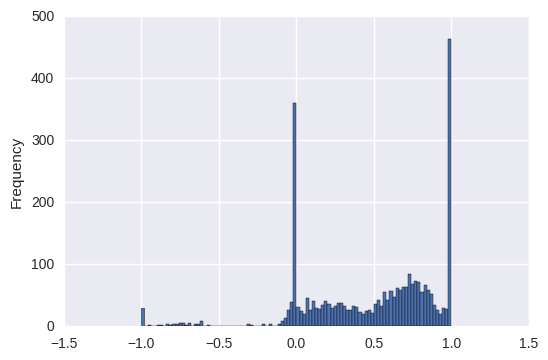

In [79]:
cor.correlation.plot.hist(bins = 100)